### Your name:

<pre> Zahir Mohammed Mandsaurwala</pre>

### Collaborators:

<pre> None</pre>


In [1]:
# Common imports
import numpy as np
import os
import tarfile
from six.moves import urllib
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import root_mean_squared_error

np.random.seed(42)

Open the housing data


In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    print(f"Loading data from: {housing_url}" )
    print(f"Saving data to:    {housing_path}" )
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
print("DATA SHAPE:", housing.shape)
housing.head(10)

Loading data from: https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz
Saving data to:    datasets\housing
DATA SHAPE: (20640, 10)


C:\Users\zmandsaurwal\AppData\Local\Temp\ipykernel_7116\685316153.py:14: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
# Get the count of number of NULL values in the dataset
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
# Count of Distinct values of categorical attribute
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


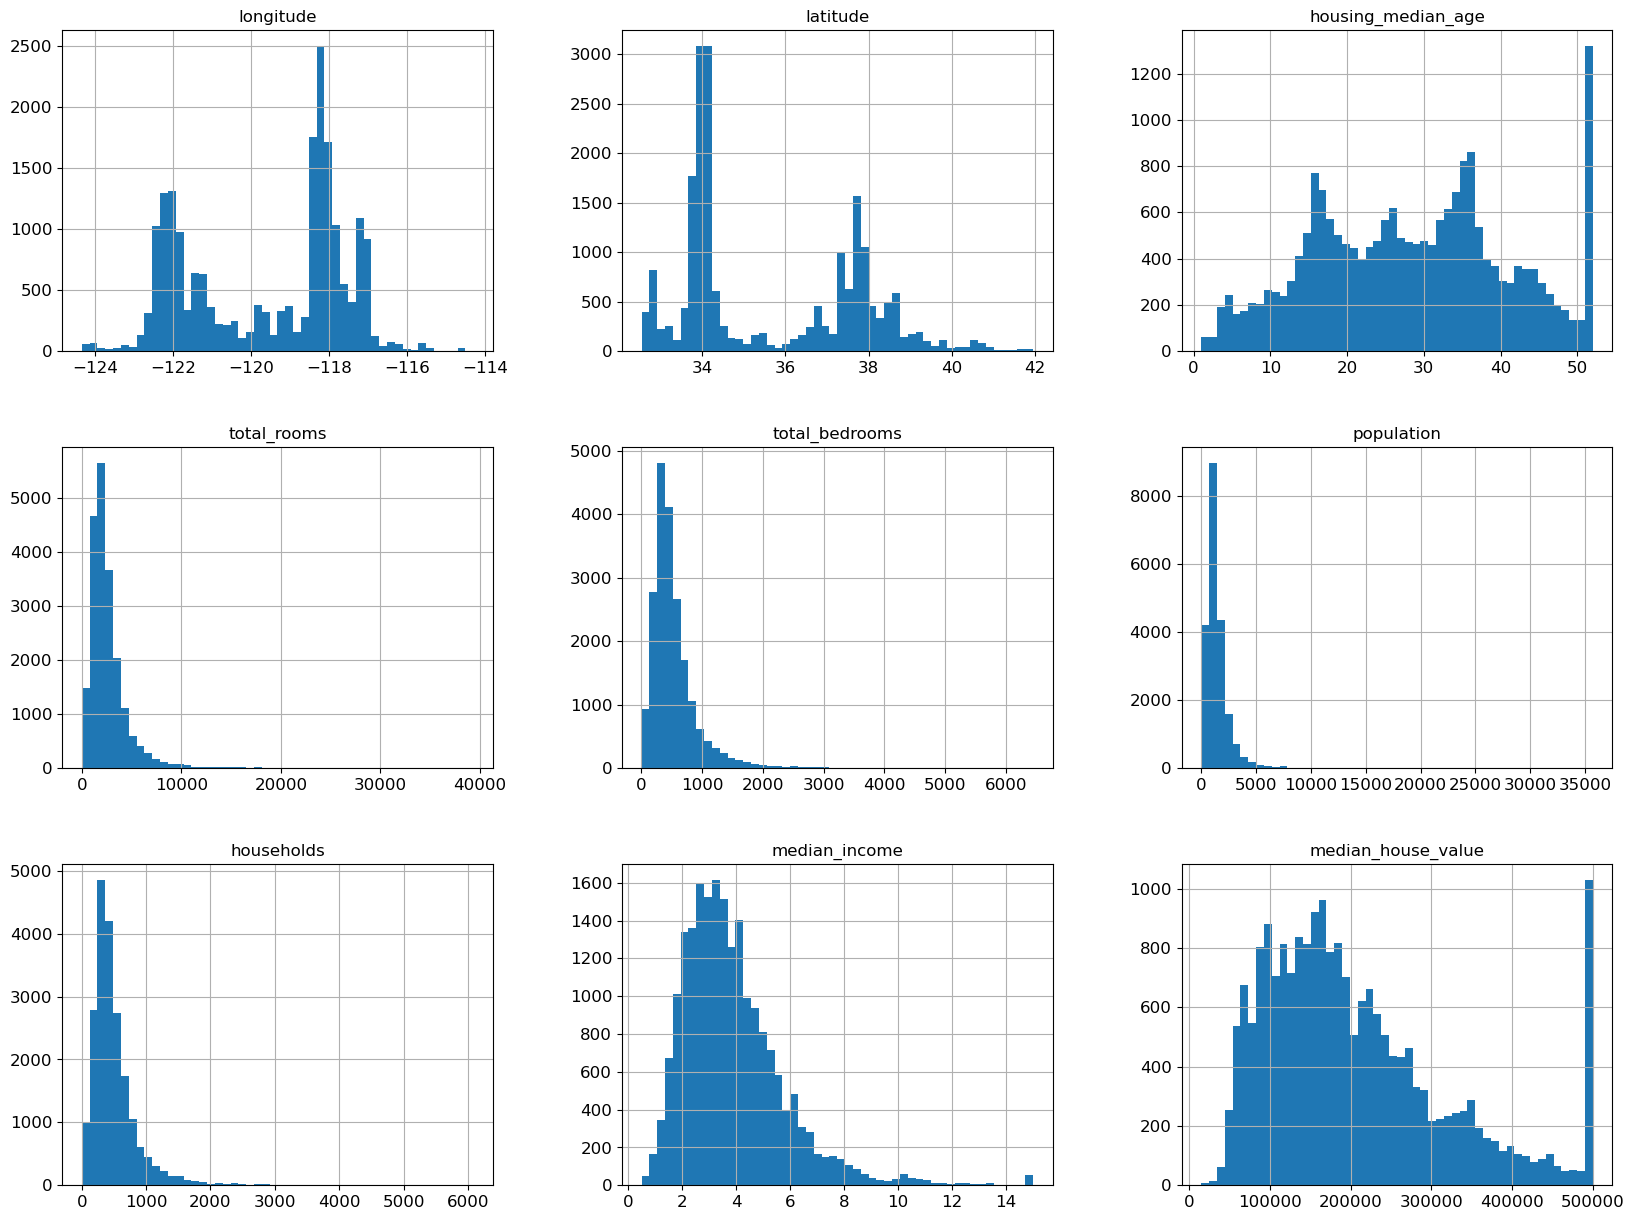

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15));
plt.show()

### Build full pipeline for the data analysis following the example of the notebook.
 Hint: the main part requested to change is the algorithm used (KNN regression)


#### Considerations for building pipeline:

- Make your notebook as compact as possible. 
- Split data into training and testing sets below.
- Convert all categorical data to one-hot vectors below
- Normalize all non-categorical data 
-  Perform KNN regression using a variety of values for n_neighbors (K) between 1 and 10 and both "uniform" and "distance" weights via a grid search where  *housing_labels* is the output and all other features are the input (similar to as seen in lecture two.)

In [7]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

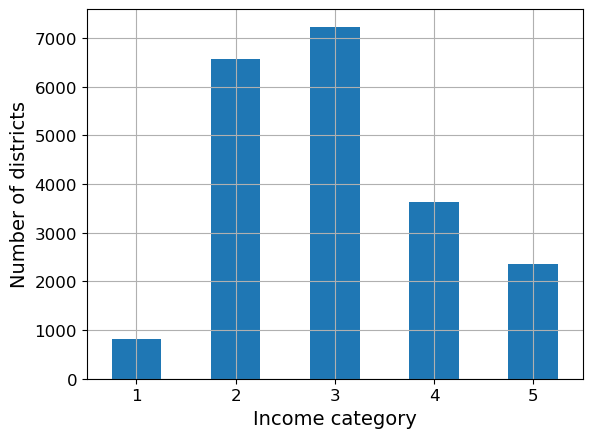

In [8]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

# Create Test Data
- Split data into training and testing sets using Stratified sampling according to Income category so that there is NO sampling bias.

In [9]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [10]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [11]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [12]:
# dropping the income_cat as this was created just for the above sampling

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Transformation Pipelines

In [13]:
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
set_config(display='diagram')
num_pipeline.set_params(simpleimputer__strategy="median")

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

- Numerical and Categorical pipelines

In [14]:
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# Convert all categorical data to one-hot vectors
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [15]:
# Data for training
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Build a Pipeline
 - ratio_pipeline function has been defined as a function so that it can be used for total_bedrooms, total_rooms and population per household transformer
- Normalize all non-categorical data

In [16]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def set_ratio_name(function_transformer, feature_names_in):
    return [f"{feature_names_in[0]}_per_{feature_names_in[1]}"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=set_ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

# Default pipeline for the remaining numerical attributes which are not part of any pipeline
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

# Creating the pre-processing pipeline with all the transformers
preprocessing = ColumnTransformer([
        ("bedrooms_per_room", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms_per_room',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function set_ratio_name at 0x00000153080BF6A0>,
                                                                      func=<fun...
                                                                      func=<ufunc 'log'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000153080F8FE0>)])

# Train the KNN Regression model

In [17]:
knn_random_grid_reg = make_pipeline(preprocessing, KNeighborsRegressor())

# Definning all the hyperparameters
param_dist = {
    "kneighborsregressor__n_neighbors": np.arange(1, 11),  # between 1 and 10
    "kneighborsregressor__weights": ["uniform", "distance"],
    "kneighborsregressor__p": [1, 2, 3],
    "kneighborsregressor__algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}

# Using RandomizedSearchCV as it performs better than GridSearchCV
random_search = RandomizedSearchCV(knn_random_grid_reg, param_dist, 
                                   scoring="neg_root_mean_squared_error", 
                                   cv=10, n_iter=10, 
                                   random_state=42, n_jobs=-1)

random_search.fit(housing, housing_labels)

print("Best Parameters:", random_search.best_params_)
print("Best RMSE:", -random_search.best_score_)

# Using the best parameters to train the model
best_knn_random_grid_reg = random_search.best_estimator_
best_knn_random_grid_reg.fit(housing, housing_labels)

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Make predictions on the test dataset
housing_predictions = best_knn_random_grid_reg.predict(X_test)
housing_predictions[:10].round(-2)

Best Parameters: {'kneighborsregressor__weights': 'distance', 'kneighborsregressor__p': 1, 'kneighborsregressor__n_neighbors': 9, 'kneighborsregressor__algorithm': 'ball_tree'}
Best RMSE: 58968.9738511325


array([449700., 212600., 206500., 160000., 208000., 170100., 111700.,
       410900., 231000., 216400.])

In [18]:
housing_labels.iloc[:10].values

array([ 72100., 279600.,  82700., 112500., 238300., 165700., 412300.,
       349600., 181300., 500001.])

In [19]:
# Calculate Final RMSE
knn_random_rmse = root_mean_squared_error(y_test, housing_predictions)
print("Final RMSE:", knn_random_rmse)

Final RMSE: 57459.39383264896


# Save the model

In [20]:
import joblib

joblib.dump(best_knn_random_grid_reg, "W2_Mandsaurwala_X585677_model.pkl")

['W2_Mandsaurwala_X585677_model.pkl']

### Conclusions
For what values of n_neighbors and weight does KNeighborsRegressor perform the best? Does it perform as well on the housing data as the linear regressor from the lectures? Why do you think this is?

<pre> 
Below are the best parameters...

Best Parameters: {'kneighborsregressor__weights': 'distance', 'kneighborsregressor__p': 1, 'kneighborsregressor__n_neighbors': 9, 'kneighborsregressor__algorithm': 'ball_tree'}
Best RMSE: 58968.9738511325
Final RMSE: 57459.39383264896

The above KNN regressor performs slightly better than Liner Regressor. Although, there exists a Liner relationship between the housing attributes, we have used hyperparameters like weight and algorithm as well as used RandomizedSearchCV to make the KNN model much more precise than the normal KNN regressor model. Also, as we see that the RMSE is best when the k value is large (n_neighbors = 9) which is happening because it smooths out the line as there are more neighbours to consider.

</pre>

### Read appending B

- Reflect on your last data project, read appendix B. Then, write down a few of the checklist items that your last data project could have used. If you have not yet done a data project, then write down a few of the items that you found most interesting.

- ANSWER:- The most interesting aspect was the use of KNeighborsRegressor with different hyperparameters. Tried to run the model with various combinations of the hyperparameter "n_iter" and then decided on the best one. Also, used various algorithms as I had learned while doing Assignment-1.


### Submit your notebook

Submit your solution to Quercus
Make sure you rename your notebook to    
W2_UTORid.ipynb    
Example W2_adfasd01.ipynb
